# Medical Cost Personal Datasets


## About Dataset
Content
Columns:

* **age**: age of primary beneficiary

* **sex**: insurance contractor gender, **female, male**

* **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally **18.5 to 24.9**

* **children**: Number of children covered by health insurance / Number of dependents

* **smoker**: Smoking

* **region**: the beneficiary's residential area in the US, **northeast, southeast, southwest, northwest**.

* **charges**: Individual medical costs billed by health insurance

## Problem 
**Can you accurately predict insurance costs??**

### 1 - Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from collections import deque

### 2 - Loading in Data

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 3 -  Data exploration

In [3]:
print(df.info())
print("-" * 60)
print("Null counts :\n",df.isnull().sum())
print("-" * 60)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
------------------------------------------------------------
Null counts :
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
------------------------------------------------------------
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  1211

##### Inconsistent checking

In [4]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


#### find and drop duplicated rows

In [5]:
df[df.duplicated(keep='last')]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [6]:
df = df.drop(labels=195, axis=0)
df.duplicated().sum()

0

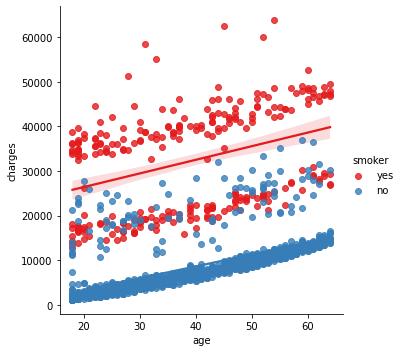

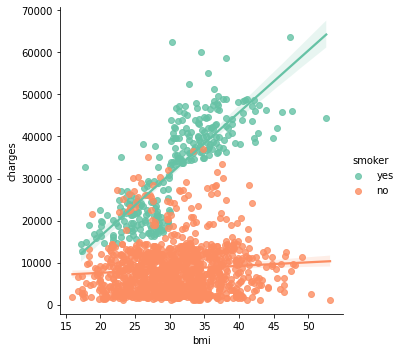

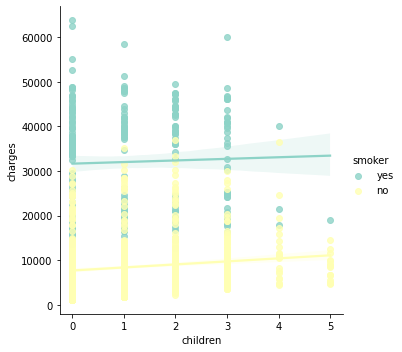

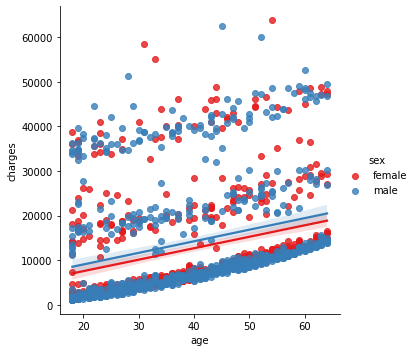

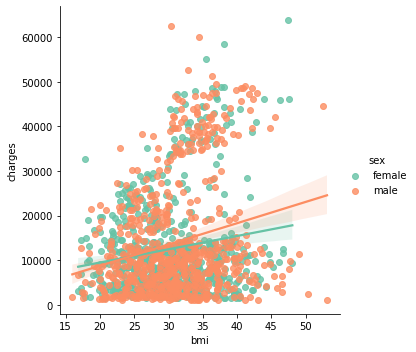

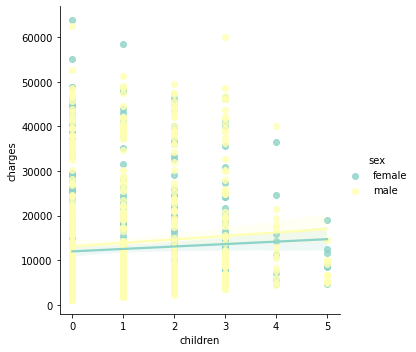

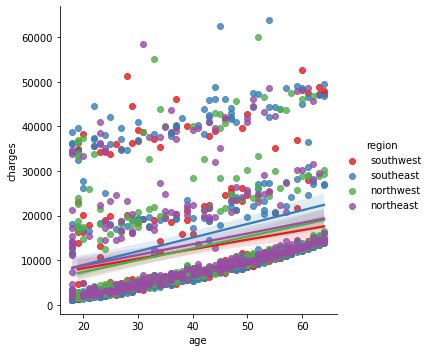

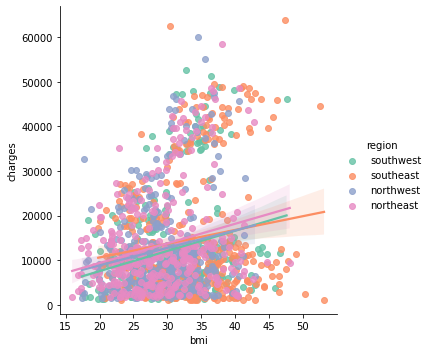

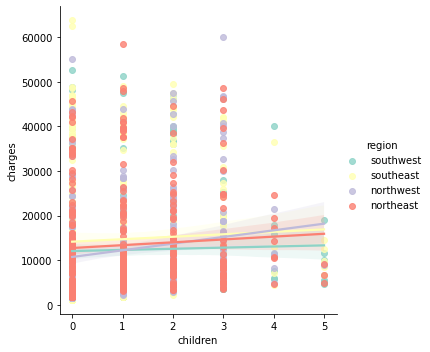

In [7]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='sex', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='sex', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='sex', palette='Set3')
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='region', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='region', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='region', palette='Set3')

##### check outlires for bmi feild 

<AxesSubplot:>

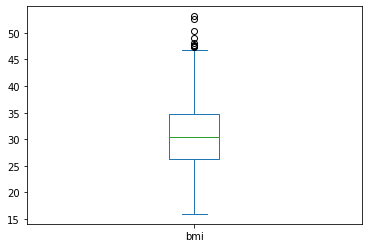

In [8]:
df['bmi'].plot(kind='box')

##### check outlires for age feild 

<AxesSubplot:>

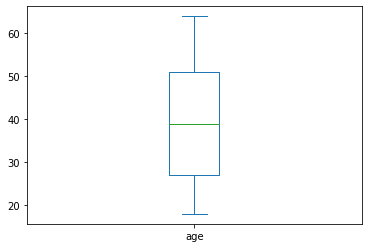

In [9]:
df['age'].plot(kind='box')

/home/mahdi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


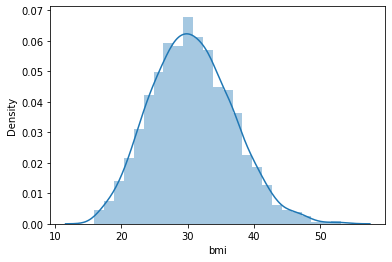

In [10]:
ax = sns.distplot(df['bmi'])
plt.show()

In [11]:
# IQR
Q1 = np.percentile(df['bmi'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['bmi'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)

# Upper bound
upper=Q3+1.5*IQR

# Lower bound
lower=Q1-1.5*IQR

# Removing the outliers
df.drop(list(df[df['bmi'] >= int(upper)].index), axis=0, inplace=True)
df.drop(list(df[df['bmi'] <= int(lower)].index), axis=0, inplace=True)
print("New Shape: ", df.shape)

Old Shape:  (1337, 7)
New Shape:  (1328, 7)


/home/mahdi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


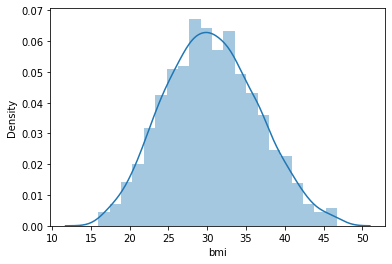

In [12]:
ax = sns.distplot(df['bmi'])
plt.show()

/home/mahdi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


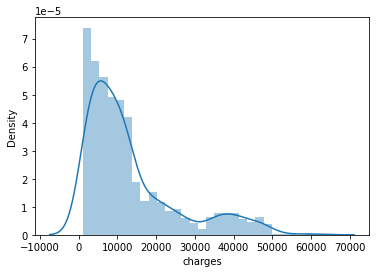

In [13]:
ax = sns.distplot(df['charges'])
plt.show()

##### check outlires for charges feild 

<AxesSubplot:>

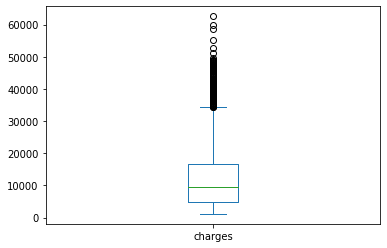

In [14]:
df['charges'].plot(kind='box')

##### Removing the outliers for charges feild

In [15]:
# IQR
Q1 = np.percentile(df['charges'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['charges'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)

# Upper bound
upper=Q3+1.5*IQR

# Lower bound
lower=Q1-1.5*IQR

# Removing the outliers
df.drop(list(df[df['charges'] >= int(upper)].index), axis=0, inplace=True)
df.drop(list(df[df['charges'] <= int(lower)].index), axis=0, inplace=True)
print("New Shape: ", df.shape)

Old Shape:  (1328, 7)
New Shape:  (1191, 7)


/home/mahdi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


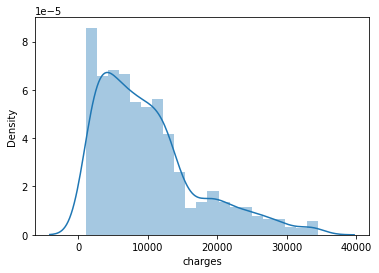

In [16]:
ax = sns.distplot(df['charges'])
plt.show()

/home/mahdi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


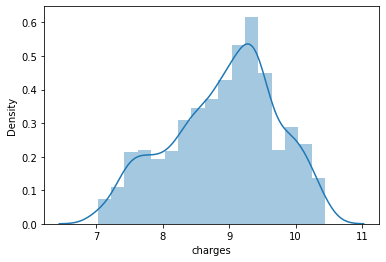

In [17]:

# Log transform
df['charges'] = np.log(df['charges'])

# df['charges'] = np.round(np.exp(df['charges']), 3)

ax = sns.distplot(df['charges'])
plt.show()

* encode smoker

In [18]:
label_encoder_smoker = LabelEncoder()
integer_encoded_smoker = label_encoder_smoker.fit_transform(list(df['smoker']))
integer_encoded_smoker = integer_encoded_smoker.reshape(len(integer_encoded_smoker), 1)

print(integer_encoded_smoker.shape)

### One hot encoding
onehot_encoder_smoker = OneHotEncoder(sparse=False)
onehot_encoded_smoker = onehot_encoder_smoker.fit_transform(integer_encoded_smoker)
print(onehot_encoded_smoker.shape)
### delelte last column 
onehot_encoded_smoker = np.delete(arr=onehot_encoded_smoker, obj=1, axis=1)
print(onehot_encoded_smoker.shape)
print(type(onehot_encoded_smoker))
print(onehot_encoded_smoker)

df['smoker'] = onehot_encoded_smoker[:,0]

(1191, 1)
(1191, 2)
(1191, 1)
<class 'numpy.ndarray'>
[[0.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]


In [19]:
label_encoder_region = LabelEncoder()
integer_encoded_region = label_encoder_region.fit_transform(list(df['region']))
integer_encoded_region = integer_encoded_region.reshape(len(integer_encoded_region), 1)

print(integer_encoded_region.shape)

### One hot encoding
onehot_encoder_region = OneHotEncoder(sparse=False)
onehot_encoded_region = onehot_encoder_region.fit_transform(integer_encoded_region)
print(onehot_encoded_region.shape)
### delelte last column 
onehot_encoded_region = np.delete(arr=onehot_encoded_region, obj=3, axis=1)
print(onehot_encoded_region.shape)
print(type(onehot_encoded_region))
print(onehot_encoded_region)


df['region_A'] = onehot_encoded_region[:,0]
df['region_B'] = onehot_encoded_region[:,1]
df['region_C'] = onehot_encoded_region[:,2]

(1191, 1)
(1191, 4)
(1191, 3)
<class 'numpy.ndarray'>
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 1. 0.]]


In [20]:
label_encoder_sex = LabelEncoder()
integer_encoded_sex = label_encoder_sex.fit_transform(list(df['sex']))
integer_encoded_sex = integer_encoded_sex.reshape(len(integer_encoded_sex), 1)

print(integer_encoded_sex.shape)

### One hot encoding
onehot_encoder_sex = OneHotEncoder(sparse=False)
onehot_encoded_sex = onehot_encoder_sex.fit_transform(integer_encoded_sex)
print(onehot_encoded_sex.shape)
### delelte last column 
onehot_encoded_sex = np.delete(arr=onehot_encoded_sex, obj=1, axis=1)
print(onehot_encoded_sex.shape)
print(type(onehot_encoded_sex))
print(onehot_encoded_sex)

df['sex'] = onehot_encoded_sex[:,0]

(1191, 1)
(1191, 2)
(1191, 1)
<class 'numpy.ndarray'>
[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


* remove region column from dataframe 

In [21]:
df = df.drop(columns=['region'])

* Reorder dataframe columns from a list of column names

In [22]:
df = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region_A', 'region_B', 'region_C','charges']]

/home/mahdi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


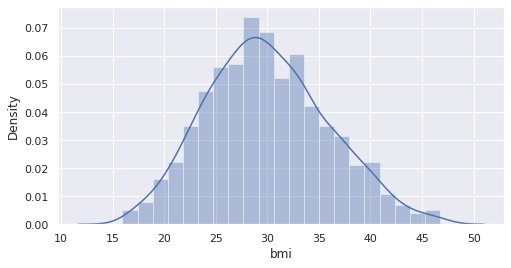

In [23]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
ax = sns.distplot(df['bmi'])
plt.show()

### min max scale for children feature 

In [24]:
X_min = 0 
X_max = 5 
for X in range(0,6):
    df['children'] = df['children'].replace(X, (X-X_min)/(X_max-X_min))

In [25]:
print(df.describe())

               age          sex          bmi     children       smoker  \
count  1191.000000  1191.000000  1191.000000  1191.000000  1191.000000   
mean     39.010915     0.513014    29.995764     0.217464     0.884971   
std      14.056634     0.500041     5.871253     0.243291     0.319191   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      26.000000     0.000000    25.800000     0.000000     1.000000   
50%      39.000000     1.000000    29.700000     0.200000     1.000000   
75%      51.000000     1.000000    33.770000     0.400000     1.000000   
max      64.000000     1.000000    46.750000     1.000000     1.000000   

          region_A     region_B     region_C      charges  
count  1191.000000  1191.000000  1191.000000  1191.000000  
mean      0.247691     0.255248     0.253568     8.921653  
std       0.431853     0.436184     0.435236     0.793997  
min       0.000000     0.000000     0.000000     7.022756  
25%       0.000000     0.000000  

In [26]:
# availableIndexList=df.index.values.tolist()
# min max scale for bmi feature
# X_min = 15.960000 
# X_max = 46.750000 
# for i in availableIndexList:
#    df['bmi'] = df['bmi'].replace(df['bmi'][i], (df['bmi'][i]-X_min)/(X_max-X_min))
    
# min max scale for age feature
#X_min = 18.000000 
#X_max = 64.000000 
#for i in availableIndexList:
#    df['age'] = df['age'].replace(df['age'][i], (df['age'][i]-X_min)/(X_max-X_min))

# min max scale for charges feature
#X_min = 1121.873900
#X_max = 34439.855900 
#for i in availableIndexList:
#    df['charges'] = df['charges'].replace(df['charges'][i], (df['charges'][i]-X_min)/(X_max-X_min))

In [27]:
corr = df.corr()  
corr.style.background_gradient(cmap='coolwarm')

,age,sex,bmi,children,smoker,region_A,region_B,region_C,charges
age,1.000000,0.019049,0.123300,0.038179,0.065645,0.001492,0.000505,-0.018858,0.635724
sex,0.019049,1.000000,-0.015964,-0.017066,0.012020,-0.005211,-0.003685,0.004130,0.056725
bmi,0.123300,-0.015964,1.000000,0.007223,0.258530,-0.132546,-0.112797,0.231329,-0.028707
children,0.038179,-0.017066,0.007223,1.000000,0.004249,-0.023610,0.013389,-0.016461,0.186300
smoker,0.065645,0.012020,0.258530,0.004249,1.000000,-0.030886,-0.018295,-0.001580,-0.474714
region_A,0.001492,-0.005211,-0.132546,-0.023610,-0.030886,1.000000,-0.335917,-0.334433,0.078448
region_B,0.000505,-0.003685,-0.112797,0.013389,-0.018295,-0.335917,1.000000,-0.341215,0.035224
region_C,-0.018858,0.004130,0.231329,-0.016461,-0.001580,-0.334433,-0.341215,1.000000,-0.056429
charges,0.635724,0.056725,-0.028707,0.186300,-0.474714,0.078448,0.035224,-0.056429,1.000000


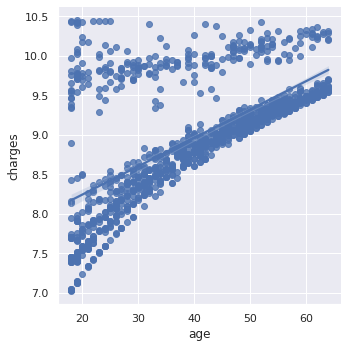

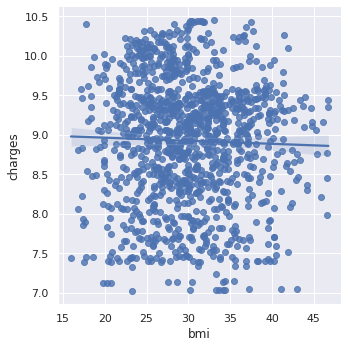

In [28]:
sns.lmplot(data=df, x="age", y="charges")
sns.lmplot(data=df, x="bmi", y="charges")

/home/mahdi/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


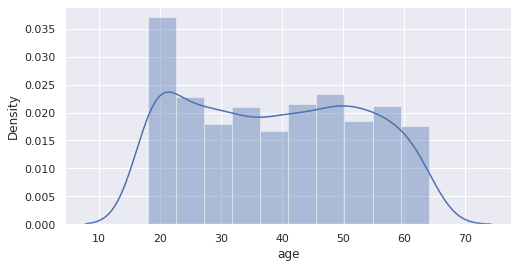

In [29]:

ax = sns.distplot(df['age'])
plt.show()

In [30]:
# scale features
df['age'] = (df['age']-df['age'].min())/(df['age'].max()-df['age'].min())
df['bmi'] = (df['bmi']-df['bmi'].min())/(df['bmi'].max()-df['bmi'].min())


df['charges'] = (df['charges']-df['charges'].min())/(df['charges'].max()-df['charges'].min())

### train test split

In [31]:
X = df[['age','sex', 'bmi', 'children', 'smoker', 'region_A', 'region_B', 'region_C']]
y = df[['charges']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)


##  Linear Regression(Multivariate case)

* Parameters Estimation using OLS method      $$W^* = (X^T X)^{-1} X^T Y$$

In [32]:
X_train_df_type_copy = X_train.copy()

one_train = np.ones((len(X_train), 1))
X_train = np.hstack((one_train, X_train)) # ----> X


y_train = [y_train] # ----> Y
X_T = [[X_train[j][i] for j in range(len(X_train))] for i in range(len(X_train[0]))] # ----> X_Transpose

W = np.matmul(np.linalg.inv(np.matmul(X_T,X_train)), np.matmul(X_T,y_train))

print(W)

[[[ 0.55076717]
  [ 0.51919685]
  [ 0.03205333]
  [ 0.04598307]
  [ 0.16067694]
  [-0.3739052 ]
  [ 0.04293281]
  [ 0.02651719]
  [ 0.00430775]]]


* fix simple linear regression structure 

In [33]:
y_pre = W[0][0] + np.matmul(X_test,W[0][1:9])  

* evaluate simple linear regression model 

In [34]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("R-squared:", r2_score(y_test, y_pre) ) 
print("Test MSE: {}".format(mean_squared_error(y_test, y_pre) ** 0.5))


R-squared: 0.6188741081630782
Test MSE: 0.13963108724684656


## Nonlinear Regression(polynomial)

* Setting up a polynomial structure

$$ if \quad  X=(x_1 \quad  x_2) \quad  ⇒  \quad φ=(1 \quad x_1 \quad  x_2 \quad  x_1^2 \quad x_2^2)$$ 

In [35]:
def polynomialStructure(X, Q):
        polydegree = Q
        row, columns = X.shape
        
        phi = deque()
        
        phi.append(np.ones(row))
        
        for degree in range(1, polydegree+1):
            for col in range(columns):
                phi.append(X.iloc[:,col].values**degree)
        
        return np.array(phi).T
    
# phi_poly = polynomialStructure(X_train_df_type_copy, 3)
# print(len(phi_poly), len(phi_poly[0]))


* Parameters Estimation using L2_regularization method      $$W^* = (φ^T φ + αI)^{-1} φ^T Y$$

In [36]:
def l2_regularization(X_train, y_train, landa=0.1):
    X_T_X_train = np.matmul(X_train.T, X_train)
    X_T_Y_train = np.matmul(X_train.T, y_train)
    W = np.matmul(np.linalg.inv(X_T_X_train + landa*np.eye(len(X_T_X_train))), X_T_Y_train)
    return W


y_train=[y_train]
y_train = np.reshape(y_train, (833, 1))

# weights_poly = l2_regularization(phi_poly, y_train)   # fit
# print(weights_poly)

In [37]:
# def fit(Q): 
#     phi_poly = polynomialStructure(X_train_df_type_copy, Q)
#     weights_poly = l2_regularization(phi_poly, y_train)

In [38]:
Q = np.arange(1, 20, 1)
mse_tr = []
mse_te = []
for q in Q:
    print(q)
    phi_poly = polynomialStructure(X_train_df_type_copy, Q)
    weights_poly = l2_regularization(phi_poly, y_train)
    
    y_pre_tr = polynomialStructure(X_train_df_type_copy, 3).dot(weights_poly)
    y_pre_te = polynomialStructure(X_test, 3).dot(weights_poly) 
    
    mse_tr.append(((y_pre_tr - y_train)**2).sum()/0.8*N)
    mse_te.append(((y_pre_te - y_test)**2).sum()/0.2*N)


plt.plot(Q, mse_tr, 'ro')
plt.plot(Q, mse_te, 'b.')
plt.legend(['MSE for train data', 'MSE for test data'])
plt.show()

1


TypeError: only integer scalar arrays can be converted to a scalar index

* evaluate Non linear regression model 

In [ ]:
y_pre = polynomialStructure(X_test, 3).dot(weights_poly)

print("R-squared:", r2_score(y_test, y_pre) ) 
print("Test MSE: {}".format(mean_squared_error(y_test, y_pre) ** 0.5))

## Nonlinear Regression(gaussianRBF)

In [ ]:
def gaussianRbfStructure(X, Q, s = 2):
        nbasisfuncs = Q
        row, columns = X.shape
        
        phi = deque()
        
        phi.append(np.ones(row))
        
        index = np.random.choice(row, size=nbasisfuncs, replace=False)
        mu = X[index, :]
        
        for number in range(len(mu)):
            phi.append([np.exp(-np.linalg.norm(i-mu[number])**2/(2*s**2)) for i in X])
        return np.array(phi).T
    
    